In [17]:
# Importing packages

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [18]:
#import file from csv
df = pd.read_csv('data/amboss_cleaned.csv')
df.head()

,user_id,date_of_first_purchase,purchased_lifetime,chapters_read_first_5_days,searches_first_5_days,questions_answered_first_5_days,created_at,market,class,md_do,university_id,device_type,marketing_source,30-day-converted,difference,year,month
0,am_202157,2019-10-15,False,15,2,0,2019-10-15,RoW,5th year,NaN,2509,desktop,unknown,1,0 days,2019,10
1,am_190945,NaN,False,15,0,283,2019-04-22,RoW,unknown,NaN,903,mobile,unknown,0,NaN,2019,4
2,am_206476,NaN,False,0,0,0,2019-12-07,RoW,3rd year,NaN,1449,mobile,advertisement,0,NaN,2019,12
3,am_189151,NaN,False,19,21,0,2019-03-31,RoW,2nd year,NaN,1452,desktop,unknown,0,NaN,2019,3
4,am_201843,NaN,False,8,0,10,2019-10-11,RoW,5th year,NaN,861,mobile,university,0,NaN,2019,10


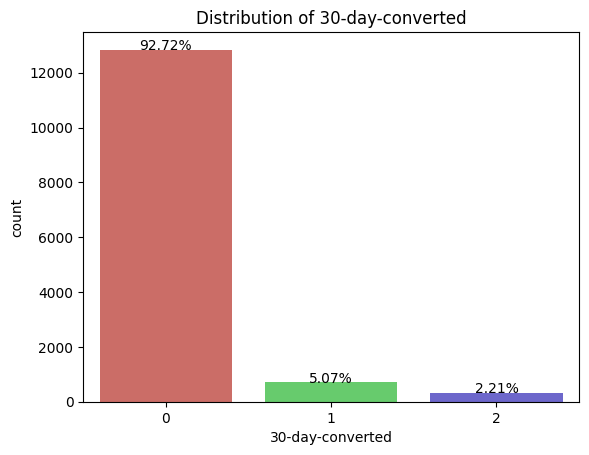

In [19]:
# plot the distribution of the target variable 30-day-converted 
sns.countplot(x='30-day-converted', data=df, palette='hls')
# add totals and percentage to the bars
n_points = df.shape[0]
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.2f}%'.format(height/n_points*100), ha="center")
plt.title('Distribution of 30-day-converted')
plt.show()



In [20]:
# get numbers of 0, 1 and 2 frim the target variable per market and percentage
display(
    print('TOTALS'),df.groupby('market')['30-day-converted'].value_counts()
)
display(
print('PERCENTAGES'),
df.groupby('market')['30-day-converted'].value_counts(normalize=True)*100
)


TOTALS


None

market  30-day-converted
RoW     0                   12761
        1                     695
        2                     293
US      0                      78
        2                      13
        1                       7
Name: count, dtype: int64

PERCENTAGES


None

market  30-day-converted
RoW     0                   92.814023
        1                    5.054913
        2                    2.131064
US      0                   79.591837
        2                   13.265306
        1                    7.142857
Name: proportion, dtype: float64

## Total number of conversion between markets

The total number of Conversion between the two markets is very imbalanced. Whereas RoW has close to 700 Conversions in 2019, there are only 7 for the US market. This can be explained by the fact, that Amboss is a german company, and the start in the US came later.

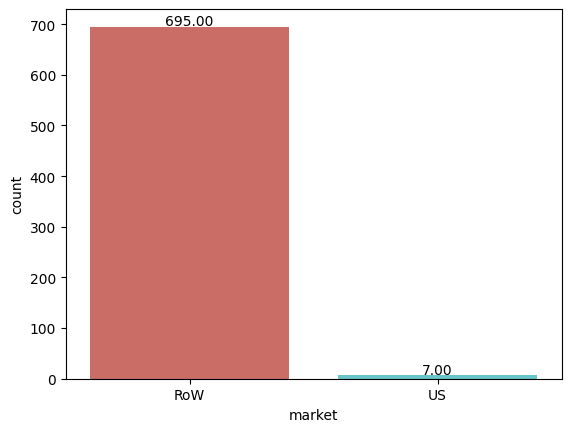

In [21]:
# showing amount of 30-day-converted = 1 (converted within 30 days) per market
sns.countplot(x='market', data=df[df['30-day-converted']==1], palette='hls')
# adding totals to bars
n_points = df[df['30-day-converted']==1].shape[0]
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.2f}'.format(height), ha="center")
plt.show()

## Conversions per month

The Amount of Conversions  per month is very volatile. During summer, there are the least conversions, whereas in winter there are the most. This can be explained by the fact, that most students are on vacation during summer, and therefore do not have time to study. In winter, there are the most conversions, because the students have to prepare for their exams.

<Axes: xlabel='month', ylabel='count'>

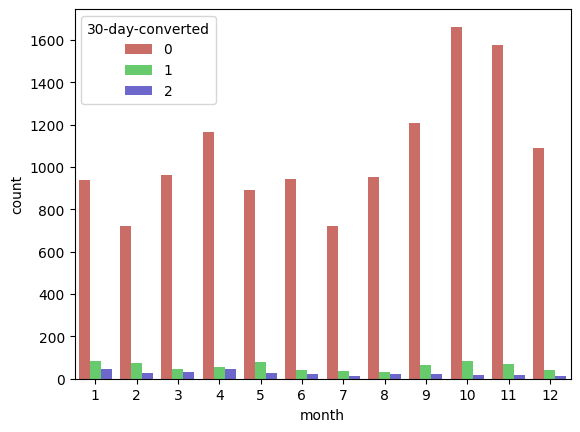

In [48]:
# showing amount of 30-day-converted = 1 per month and market
sns.countplot(x='month', data=df, hue='30-day-converted', palette='hls')

# showing amount of registered user per month and market
#sns.countplot(x='month', data=df, hue='market', palette='hls')

## Channel efficiency

Also here the perfomance of each channel is very different. Recommendations by friends lead in total as well as in conversionrate

Ambassadors add very little conversions in total but with a very high conversion rate.

100 of around 700 conversions cannot be explaind via some channel. This is a very high number and should be investigated further.

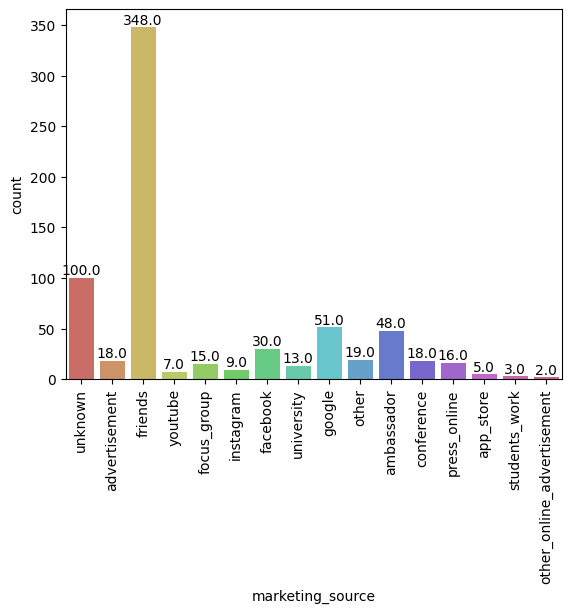

In [30]:
# showing amount of 30-day-converted = 1 per marketing_source 
sns.countplot(x='marketing_source', data=df[df['30-day-converted']==1], palette='hls')
plt.xticks(rotation=90) # tilt x labels to be readable
# adding totals to bars
n_points = df[df['30-day-converted']==1].shape[0]
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{}'.format(height), ha="center")
plt.show()


In [31]:
# calculating conversion rate per marketing_source
# getting all registrations per marketing_source
df_registrations = df.groupby('marketing_source')['30-day-converted'].count().reset_index()
# getting all 30-day-converted = 1 and 2 per marketing_source
df_converted = df[df['30-day-converted']!=0].groupby('marketing_source')['30-day-converted'].count().reset_index()
# merging both dataframes
df_conversion_rate = pd.merge(df_registrations, df_converted, on='marketing_source', how='left')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


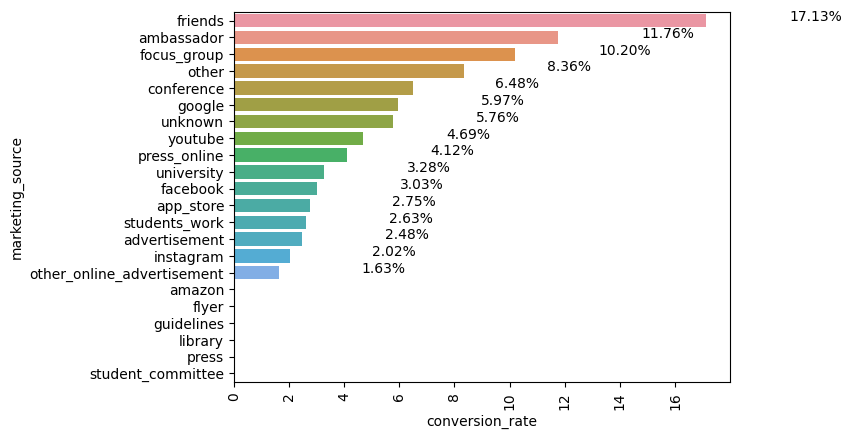

In [41]:
# plotting conversion rate per marketing_source
df_conversion_rate['conversion_rate'] = df_conversion_rate['30-day-converted_y']/df_conversion_rate['30-day-converted_x']*100
#sort df by conversion rate
df_conversion_rate = df_conversion_rate.sort_values(by='conversion_rate', ascending=False)


sns.barplot(y='marketing_source', x='conversion_rate', data=df_conversion_rate)
# rotate plot


plt.xticks(rotation=90) # tilt x labels to be readable
# adding totals to bars
n_points = df[df['30-day-converted']==1].shape[0]
# adding percentages to the bars
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y()+p.get_height()/2., '{:.2f}%'.format(width), ha="left")
plt.show()